### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

#### Step 1. Get general idea of the table with .info()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Step 2. Investigate null value column data

From the step above, we see that the following columns have missing values 
```
 14  car                   108 non-null    object
 15  Bar                   12577 non-null  object
 16  CoffeeHouse           12467 non-null  object
 17  CarryAway             12533 non-null  object
 18  RestaurantLessThan20  12554 non-null  object
 19  Restaurant20To50      12495 non-null  object
```

#### Step 3. Investigate Duplicate Values

In [14]:
data.duplicated().sum()

74

#### Step 4. Investigate data values for each column to see if they make sense

In [16]:
for col in data.columns:
    print(data[col].value_counts(), '\n')

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64 

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64 

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64 

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64 

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64 

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64 

expiration
1d    7091
2h    5593
Name: count, dtype: int64 

gender
Female    6511
Male      6173
Name: count, dtype: int64 

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64 

maritalStatus
Married partner      5100
Single         

3. Decide what to do about your missing data -- drop, replace, other...

#### Dropping duplicate values: 
From Step 2 in Q2 above, we see there are 74 duplicate values out of 12684, which accounts for only .58% of the data. 
We are hypothesizing these are accidentally re-submitted / counted values for the same person because it is
unlikely that the same exact factors across all the columns apply to different people. Thus, let's remove these duplicate values.

In [19]:
cleaned_data = data.drop_duplicates()

In [20]:
len(cleaned_data)

12610

#### Dropping columns with mostly missing data:
There are now 12610 rows remaining after dropping the duplicates. 
From Step 2 in Q2 above, we can see there is a lot of missing data in the car column. Only 108 out of 12610 rows have car data, which is equivalent to only 0.86% of the data. Thus, we can just drop this column since there's not enough information to yield valuable insights.

In [22]:
cleaned_data = data.drop(columns=['car'])

#### Dropping rows with NaN in them: 
Now, let's take a look at the percentage of rows that have a NaN value in them

In [24]:
# Counting the number of rows with a NaN value
num_rows_with_nan = cleaned_data.isnull().any(axis=1).sum() 
print(f'Number of rows with NaN: {num_rows_with_nan}')

# Percentage of rows with NaN
percentage_of_rows_with_nan = num_rows_with_nan / len(cleaned_data) * 100
print(f'Percentage of rows with NaN: {percentage_of_rows_with_nan:.2f}%')

Number of rows with NaN: 605
Percentage of rows with NaN: 4.77%


Because the percentage of rows containing an NaN value is < 5% of all the data, I think it's okay to drop those rows as there's still enough rows left to analyze

In [26]:
cleaned_data = cleaned_data.dropna()

#### Final Table After Data Cleaning Steps
1. Removed Duplicates
2. Removed Car column
3. Removed Rows with NaN in them

In [28]:
cleaned_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [30]:
cleaned_data['Y'].sum() / len(cleaned_data)

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Counts of Coupon Type'}, xlabel='Coupon Type', ylabel='Count'>

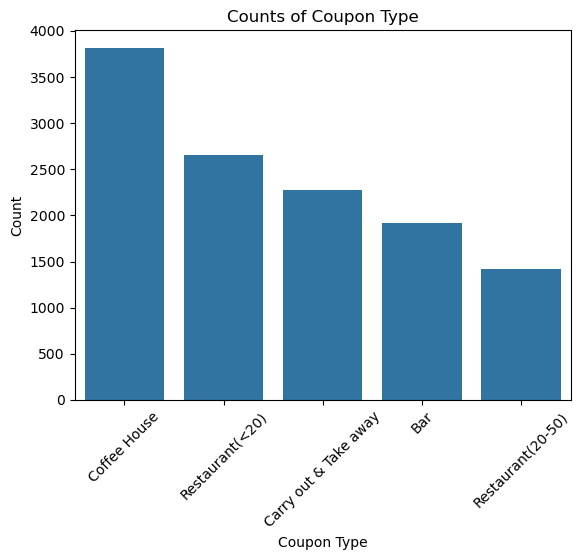

In [32]:
plt.title('Counts of Coupon Type')
plt.ylabel('Count')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
sns.barplot(data=cleaned_data['coupon'].value_counts())

6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Temperature (°F) Histogram'}, xlabel='Temperature (°F)', ylabel='Count'>

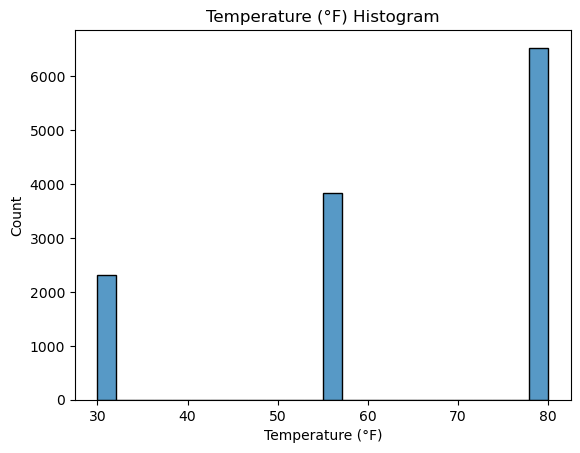

In [34]:
plt.title('Temperature (°F) Histogram')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
df = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [38]:
df['Y'].sum() / len(df)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
mapping = {
    'never': 1,
    'less1': 1,
    '1~3': 1, 
    '4~8': 0,
    'gt8': 0,
}
df['bar_lte_3'] = df['Bar'].map(mapping)

In [41]:
lte3 = df.query('bar_lte_3 == 1')        
lte3_acceptance_rate = lte3['Y'].sum() / len(lte3)

gt3 = df.query('bar_lte_3 == 0')
gt3_acceptance_rate = gt3['Y'].sum() / len(gt3)
print('The acceptance rates of')
print(f'\t* those who went to a bar 3 or fewer times a month: {lte3_acceptance_rate:.2f}')
print(f'\t* those who went to a bar more than 3 times: {gt3_acceptance_rate:.2f}')
print('Thus, we can see that those who go to bars more often (> 3 times per month) are more likely to accept the Bar coupon '
     + 'than those who go to the bars less often (<= 3 times per month)')

The acceptance rates of
	* those who went to a bar 3 or fewer times a month: 0.37
	* those who went to a bar more than 3 times: 0.77
Thus, we can see that those who go to bars more often (> 3 times per month) are more likely to accept the Bar coupon than those who go to the bars less often (<= 3 times per month)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
bar_mapping = {
    'never': 0,
    'less1': 0,
    '1~3': 1, 
    '4~8': 1,
    'gt8': 1,
}

age_mapping = {
    '21': 0,
    '26': 1,
    '31': 1,
    '50plus': 1,
    '36': 1,
    '41': 1,
    '46': 1,
    'below21': 0,
}

df['bar_gte_1'] = df['Bar'].map(bar_mapping)
df['age_gt_25'] = df['age'].map(age_mapping)

In [44]:
target_bar_and_age_mask = (df['bar_gte_1'] == 1) & (df['age_gt_25'] == 1)

In [45]:
target_bar_and_age = df[target_bar_and_age_mask]
other_bar_and_age = df[~target_bar_and_age_mask]

accept_rate_target_bar_and_age = target_bar_and_age['Y'].sum() / len(target_bar_and_age)
accept_rate_other_bar_and_age = other_bar_and_age['Y'].sum() / len(other_bar_and_age)

print('The acceptance rates of')
print(f'\t* those who went to a bar 1 or more times a month and are over the age of 25: {accept_rate_target_bar_and_age:.2f}')
print(f'\t* those who were not the above: {accept_rate_other_bar_and_age:.2f}')
print('Thus, we can see that those who went to a bar 1 or more times a month and are over the age of 25 are more likely to accept the Bar coupon '
     + 'than those who are not.')

The acceptance rates of
	* those who went to a bar 1 or more times a month and are over the age of 25: 0.70
	* those who were not the above: 0.34
Thus, we can see that those who went to a bar 1 or more times a month and are over the age of 25 are more likely to accept the Bar coupon than those who are not.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
passenger_mapping = {
    'Friend(s)': 1,
    'Partner': 1,
}
occupation_mapping = {
    'Farming Fishing & Forestry': 0,
}
df['not_kid_passenger'] = df['passanger'].map(passenger_mapping).fillna(0)
df['not_fff'] = df['occupation'].map(occupation_mapping).fillna(1)

In [48]:
target_bar_age_passenger_mask = (df['bar_gte_1'] == 1) & (df['not_kid_passenger'] == 1) & (df['not_fff'] == 1)

In [49]:
target_bar_age_passenger = df[target_bar_age_passenger_mask]
other_bar_age_passenger = df[~target_bar_age_passenger_mask]

accept_rate_target_bar_age_passenger = target_bar_age_passenger['Y'].sum() / len(target_bar_age_passenger)
accept_rate_other_bar_age_passenger = other_bar_age_passenger['Y'].sum() / len(other_bar_age_passenger)

print('The acceptance rates of')
print(f'\t* those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {accept_rate_target_bar_age_passenger:.2f}')
print(f'\t* those who were not the above: {accept_rate_other_bar_age_passenger:.2f}')
print('Thus, we can see that those who go to bars more than once a month and had passengers that were not a kid '
      + 'and had occupations other than farming, fishing, or forestry are more likely to accept the Bar coupon than those who are not.')

The acceptance rates of
	* those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.72
	* those who were not the above: 0.38
Thus, we can see that those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more likely to accept the Bar coupon than those who are not.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [51]:
marital_status_mapping = {
    'Widowed': 0,
}

age_under_30_mapping = {
    '21': 1,
    '26': 1,
    'below21': 1,
}

cheap_restaurant_mapping = {
    '4~8': 1,
    'gt8': 1,
}

income_mapping = {
    'Less than $12500': 1,
    '$12500 - $24999': 1,
    '$25000 - $37499': 1,
    '$37500 - $49999': 1,
}

df['not_widowed'] = df['maritalStatus'].map(marital_status_mapping).fillna(1)
df['age_lt_30'] = df['age'].map(age_under_30_mapping).fillna(0)
df['cheap_restaurant_gte_4'] = df['RestaurantLessThan20'].map(cheap_restaurant_mapping).fillna(0)
df['income_lt_50k'] = df['income'].map(income_mapping).fillna(0)

In [52]:
# Target 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# Target 2: go to bars more than once a month and are under the age of 30 OR
# Target 3: go to cheap restaurants more than 4 times a month and income is less than 50K.
target1_mask = (df['bar_gte_1'] == 1) & (df['not_kid_passenger'] == 1) & (df['not_widowed'] == 1)
target1 = df[target1_mask]

target2_mask = (df['bar_gte_1'] == 1) & (df['age_lt_30'] == 1)
target2 = df[target2_mask]

target3_mask = (df['cheap_restaurant_gte_4'] == 1) & (df['income_lt_50k'] == 1)
target3 = df[target3_mask]

In [53]:
accept_rate_target1 = target1['Y'].sum() / len(target1)

accept_rate_target2 = target2['Y'].sum() / len(target2)

accept_rate_target3 = target3['Y'].sum() / len(target3)

In [54]:
df['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [55]:
print('The acceptance rates of:')
print(f'\t* those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {accept_rate_target1:.2f}')
print(f'\t* those who go to bars more than once a month and are under the age of 30: {accept_rate_target2:.2f}')
print(f'\t* those who go to cheap restaurants more than 4 times a month and income is less than 50K: {accept_rate_target3:.2f}')


The acceptance rates of:
	* those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.72
	* those who go to bars more than once a month and are under the age of 30: 0.72
	* those who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We see that if a driver already frequents a bar > 3 times a month, they are likely to accept the bar coupon at 77% percent. Even if they go less frequently but still go at least once a month, if they either 1) have a non-kid passenger with them or 2) are below 30 years old, they are also likely to accept the bar coupon at 70% and 72% percent respectively.

In summary, if a person goes to a bar > 3 times a month, send them a bar coupon. Otherwise if they go to a bar >= 1 time a month, send them a bar coupon if they either 1) have a non-kid passenger with them or 2) are below 30 years old. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In the below cells, I explored the Coffee House coupon group. 

The recommendation would be to send the Coffee House coupon to people with the following characteristics:
* People whose destination is No Urgent Place
* People whose income is outside the range of \\$62,500 - \\$87,499
* People who go to a coffee shop at least once a month
* Use an expiration time of 1 day for the coupon 

In [60]:
df_coffee = cleaned_data[cleaned_data['coupon'] == 'Coffee House'].copy()

In [61]:
accept_rate = df_coffee['Y'].sum() / len(df_coffee)
print(f'{accept_rate:.2f} of people who received a Coffee coupon accepted it')

0.50 of people who received a Coffee coupon accepted it


In [62]:
df_encoded = pd.get_dummies(df_coffee, columns=['expiration', 'gender', 'destination', 'temperature'], dtype=float)

In [63]:
df_encoded.head()

,passanger,weather,time,coupon,age,maritalStatus,has_children,education,occupation,income,...,expiration_1d,expiration_2h,gender_Female,gender_Male,destination_Home,destination_No Urgent Place,destination_Work,temperature_30,temperature_55,temperature_80
23,Friend(s),Sunny,10AM,Coffee House,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
26,Friend(s),Sunny,2PM,Coffee House,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
27,Friend(s),Sunny,2PM,Coffee House,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
28,Friend(s),Sunny,2PM,Coffee House,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,Friend(s),Sunny,6PM,Coffee House,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
corr = df_encoded.corr(numeric_only=True)
corr

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_1d,expiration_2h,gender_Female,gender_Male,destination_Home,destination_No Urgent Place,destination_Work,temperature_30,temperature_55,temperature_80
has_children,1.000000,NaN,0.102322,0.010651,-0.043098,0.043098,-0.013658,0.003294,-0.003294,0.135718,-0.135718,-0.025301,0.011551,0.011732,-0.002176,0.055408,-0.051589
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,0.102322,NaN,1.000000,0.279968,-0.292716,0.292716,-0.094128,-0.074250,0.074250,0.008729,-0.008729,-0.179016,0.000724,0.179083,0.097008,0.105586,-0.153847
toCoupon_GEQ25min,0.010651,NaN,0.279968,1.000000,-0.139874,0.139874,-0.089673,-0.232383,0.232383,0.006325,-0.006325,0.100899,-0.314072,0.271055,-0.084861,0.188113,-0.132610
direction_same,-0.043098,NaN,-0.292716,-0.139874,1.000000,-1.000000,0.029033,0.107192,-0.107192,0.002088,-0.002088,0.230938,-0.518614,0.382922,0.092163,-0.124843,0.068328
direction_opp,0.043098,NaN,0.292716,0.139874,-1.000000,1.000000,-0.029033,-0.107192,0.107192,-0.002088,0.002088,-0.230938,0.518614,-0.382922,-0.092163,0.124843,-0.068328
Y,-0.013658,NaN,-0.094128,-0.089673,0.029033,-0.029033,1.000000,0.150555,-0.150555,-0.010778,0.010778,-0.147284,0.176650,-0.061454,-0.031992,-0.060732,0.075421
expiration_1d,0.003294,NaN,-0.074250,-0.232383,0.107192,-0.107192,0.150555,1.000000,-1.000000,-0.002705,0.002705,0.042481,0.050963,-0.103141,0.112561,-0.068803,0.003743
expiration_2h,-0.003294,NaN,0.074250,0.232383,-0.107192,0.107192,-0.150555,-1.000000,1.000000,0.002705,-0.002705,-0.042481,-0.050963,0.103141,-0.112561,0.068803,-0.003743
gender_Female,0.135718,NaN,0.008729,0.006325,0.002088,-0.002088,-0.010778,-0.002705,0.002705,1.000000,-1.000000,-0.003965,-0.008749,0.014361,-0.027864,-0.004483,0.019569


In [65]:
# Looking at the correlation with Y - whether they accepted the coffee coupon
corr.loc['Y', :]

has_children                  -0.013658
toCoupon_GEQ5min                    NaN
toCoupon_GEQ15min             -0.094128
toCoupon_GEQ25min             -0.089673
direction_same                 0.029033
direction_opp                 -0.029033
Y                              1.000000
expiration_1d                  0.150555
expiration_2h                 -0.150555
gender_Female                 -0.010778
gender_Male                    0.010778
destination_Home              -0.147284
destination_No Urgent Place    0.176650
destination_Work              -0.061454
temperature_30                -0.031992
temperature_55                -0.060732
temperature_80                 0.075421
Name: Y, dtype: float64

It looks like the notable significant correlations (> 0.1) are
* expiration_1d:                  0.150555
* destination_No Urgent Place:    0.176650

<Axes: title={'center': 'Coupon Acceptance vs Income'}, xlabel='Income in $', ylabel='Coupon Acceptance'>

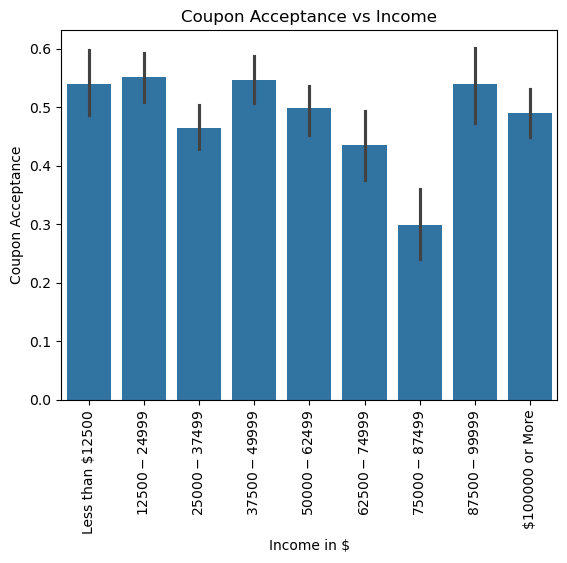

In [67]:
plt.title('Coupon Acceptance vs Income')
plt.xlabel('Income in $')
plt.ylabel('Coupon Acceptance')
plt.xticks(rotation=90)
sns.barplot(df_coffee, x='income', y='Y', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])

In [68]:
df_coffee['income'].value_counts()

income
$25000 - $37499     617
$12500 - $24999     565
$37500 - $49999     559
$100000 or More     525
$50000 - $62499     512
Less than $12500    298
$62500 - $74999     271
$87500 - $99999     241
$75000 - $87499     228
Name: count, dtype: int64

Based on the bar graph above and seeing there's enough data amongst all income brackets, it looks like the acceptance rate of the income levels of \\$62,500 - \\$74,999 and \\$75,000 - \\$87,499 are the lowest amongst the rest of the income brackets, with the former around .45 and the latter around .3. 

Thus, it looks like generally people around the combined income bracket of \\$62,500 - \\$87,499 are less likely to accept the coupon.

In [70]:
df_coffee['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

In [71]:
coffee_mapping = {
    'never': 0,
    'less1': 0,
    '1~3': 1, 
    '4~8': 1,
    'gt8': 1,
}

coffee_age_mapping = {
    '21': 0,
    '26': 1,
    '31': 1,
    '50plus': 1,
    '36': 1,
    '41': 1,
    '46': 1,
    'below21': 0,
}

df_coffee['coffee_gte_1'] = df_coffee['CoffeeHouse'].map(coffee_mapping)
df_coffee['age_lt_30'] = df_coffee['age'].map(coffee_age_mapping)

In [72]:
df_coffee[['Y', 'coffee_gte_1', 'age_lt_30']].corr()

,Y,coffee_gte_1,age_lt_30
Y,1.000000,0.318583,-0.052810
coffee_gte_1,0.318583,1.000000,-0.053688
age_lt_30,-0.052810,-0.053688,1.000000


Based on the correlation matrix if someone goes to a coffee shop >= once a month, they're likely to accept the coffee coupon.